In [1]:
# from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 
import csv
from tabulate import tabulate
import os

In [23]:
def sorting_cea(tabulation, input):
    # reading input file
    input_list = []
    with open(input, "rt") as input_file:
        for line in input_file:
            input_list.append(line)
    
    for i in input_list:
        if "o/f= " in i:
            i = i[4:-1]
            ofr_list = i.split(",")
        if "p,psia= " in i:
            i = i[8:-1]
            p_list = i.split(",")

    print("OF Ratios: ", ofr_list)
    print("Chamber Pressures: ", p_list)
    
    #reading tabulation
    tabulation_file = open(tabulation)
    tab_list= list(csv.reader(tabulation_file, delimiter="\t"))

    # pops out the variables from the first row of the tabulation
    vars = tab_list.pop(0)[0].split()
    print("variables: ", vars)

    # Divides tabulation into Chamber, Throat, and Exit data
    chamber = []
    throat = []
    exit = []
    pn = len(p_list)

    if pn > 1:
        chambers = []
        throats = []
        exits = []

        for i in range(pn):
            chambers.append([])
            throats.append([])
            exits.append([])
            exit.append([])

    for i in range(len(tab_list)):
        if i % (2+len(exit)) == 0:
            chamber.append(tab_list[i])
        if i % (2+len(exit)) == 1:
            throat.append(tab_list[i])
        for j in range(pn):
            if i % (2+len(exit)) == j+2:
                exit[j].append(tab_list[i])

    # print(tabulate(chamber))

    if pn > 1:
        length = int(len(chamber)/pn)

        # for i in range(length):
        #     for j in range(pn):
        #         chambers[j].append(chamber[i*(j+1)])
        #         throats[j].append(throat[i*(j+1)])

        for i in range(pn):
            for j in range(len(exit[i])):
                if j % pn == i:
                    exits[i].append(exit[i][j])
                    throats[i].append(throat[j])
                    chambers[i].append(chamber[j])
        
    # print(tabulate(chambers[0]))

    return [ofr_list, p_list, vars, chambers, throats, exits]

In [39]:
dirname = os.path.abspath('')

# place your input file and tabulation into the same file as this code and enter the names of the respective files below: 
# tabulation = os.path.join(dirname, "CEA_tabulation_meth_400.txt")
# input = os.path.join(dirname, "CEA_input.txt")
# gas meth at 400k temp
tabulation = os.path.join(dirname, "CEA_gmethlox_2-5_tab.txt")
input = os.path.join(dirname, "CEA_gmethlox_2-5_input.txt")


sorted_cea = sorting_cea(tabulation, input)

OF Ratios:  [' 1.5', ' 1.6', ' 1.7', ' 1.8', ' 1.9', ' 2', ' 2.1', ' 2.2', ' 2.3', ' 2.4', ' 2.5', ' 2.6', ' 2.7', ' 2.8', ' 2.9', ' 3']
Chamber Pressures:  ['200', ' 300', ' 400', ' 500']
variables:  ['isp', 't']


In [40]:
def plotting(input_thing, **kwargs):
    ofr_list, p_list, vars, chamber, throat, exit = input_thing
    
    # T vs ISP plots
    isp = []
    t = []
    isp_ind = vars.index("isp")
    t_ind = vars.index("t")
    # print(isp_ind)
    
    # for each pressure range
    for i in range(len(p_list)):
        # print(exit[i][2][0].split())
        # sorting through the exits
        isp.append([])
        t.append([])
        for j in range(len(exit[i])):
            isp[i].append(float(exit[i][j][0].split()[isp_ind])/9.8)
            t[i].append(float(chamber[i][j][0].split()[t_ind]))

        # print(exit[i])
        # print(isp)

        fig, ax1 = plt.subplots()

        ax1.plot(ofr_list, isp[i], color = "red")
        ax1.set_xlabel("OF ratio", color = "white")
        ax1.set_ylabel("Isp (s)", color = "red")
        ax1.tick_params(axis="both", labelcolor = "white")
        title = "Temperature and Specific impulse at {pressure} chamber pressure".format(pressure = p_list[i])
        ax1.set_title(title, color="white")

        ax2 = ax1.twinx()
        ax2.set_ylabel('temperature (K)', color="green")  
        ax2.plot(ofr_list, t[i], color="green")
        ax2.tick_params(axis='y', labelcolor="white")

        # plt.show()

    # print(tabulate(isp))
    
    # 3D ISP, OF, P plots + flattened
    # ax = plt.axes(projection="3d")
    # p_list_mesh = []
    # ofr_list_mesh = []
    # for i in range(len(ofr_list)):
    #     p_list_mesh.append(p_list)
    # for i in range(len(p_list)):
    #     ofr_list_mesh.append(ofr_list)

    # p_list_mesh = np.array(p_list_mesh).transpose()
    # ofr_list_mesh = np.array(ofr_list_mesh)
    # isp = np.array(isp)

    # print(ofr_list_mesh.size())
    # print((p_list_mesh))
    # print((isp))

    # ax.plot_surface( p_list, ofr_list, isp, cmap="viridis", edgecolor="none")
    # ax.tick_params(axis="both", color="white")
    # plt.show
    
    # 3D T, OF, P plots + flattened

    # Fuel volume vs OF plots?
    return t, isp, ofr_list

--------  -------  --------  --------
   2.5       2.6      2.7       2.25
 270.418   271.52   272.235   265.648
3162.5    3223.4   3273.5    2954.7
--------  -------  --------  --------


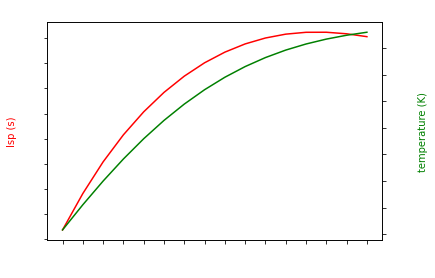

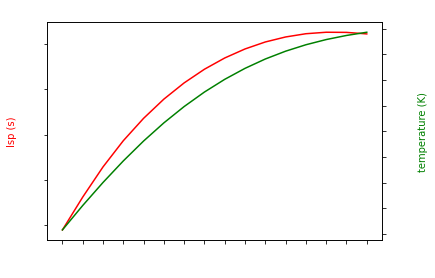

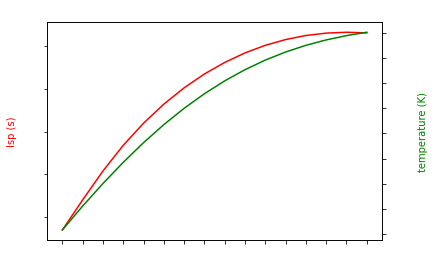

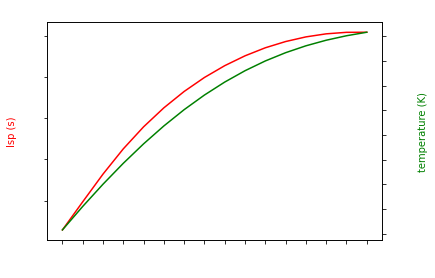

In [41]:
# getting user input, make this prettier
t, isp, ofr_list = plotting(sorted_cea)

# enter OF values you want to interpolate
of_value = [2.5, 2.6, 2.7, 2.25]
pressure = 1

isp_interp = np.interp(of_value, ofr_list, isp[pressure])
t_interp = np.interp(of_value, ofr_list, t[pressure])
# v_interp = np.interp(of_value, ofr_list,)
pretty = [of_value, isp_interp, t_interp]
print(tabulate(pretty))

In [6]:
dot_m = 2.51
time = 15
fOF = 2
mass = dot_m * time

mass_fuel = mass/(fOF + 1)
mass_ox = fOF * mass_fuel
Density_ox = 71.23
Density_meth = 26.51


Volume = mass_ox / Density_ox + mass_fuel / Density_meth
print(Volume*28.3168)

23.38361352519264


In [7]:
class rocket:
    # constructor
    def __init__(self, m_dry, m_prop, mass_flow, burntime, isp, cd, diameter):
        
        # user defined rocket
        self._m_dry = m_dry
        self._m_prop = m_prop
        self._mass_flow = mass_flow
        self._burntime = burntime
        self._isp = isp
        self._cd = cd
        self._d = diameter
        
        # calculate area of rocket
        self._area = np.pi * (self._d/2)**2
        self._ugly_mass_flow = mass_flow

        # calculate propellant mass of rocket
        # self._m_prop = mass_flow * burntime

        # self.state_variables
    
    def _mass(self, t): 
        if t < self._burntime:
            mass = self._m_dry + self._m_prop - self._ugly_mass_flow * t #ugly
            # print("omgt: ", str(t), " m: ", str(mass))
            return mass
        else:
            self._mass_flow = 0 
            mass = self._m_dry
            return mass 
    
    # for troposphere so altitude < 36152 https://www.grc.nasa.gov/www/k-12/airplane/atmos.html
    # def _air_density(self, altitude):
    #     T = 59 - 0.00356 * altitude # temperature at that level
    #     p = 2116 * ((T + 459.7)/518.6)**5.256
    #     rho = p / (1718 (T + 459.7)) * 32.174 # converting from slugs/ft^3 to lb/ft^3
    #     return rho
        
    def _vectorfield(self, state, t):
        #state
        v, p = state
        
        # parameters        
        rho = 0.0765 
        
        # relations H&H, and aero. 
        f = [((self._isp * self._mass_flow * 9.8) - (self._mass(t) * 9.8) - (self._cd * rho * v**2 * np.pi* (self._d/2)**2/2) 
              - self._mass_flow * v)/self._mass(t),
             v] 
        
        return f
    
    def altitude(self):
        # initial conditions
        
        v0 = 0
        p0 = 0
        w0 = [v0, p0]
        
        stoptime = 100
        numpoints = 200
        # abserr = 1.0e-8
        # relerr = 1.0e-6
        

        t = [ stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]
        
        solution = odeint(self._vectorfield, w0, t)  #, atol = abserr, rtol = relerr)
        
        v = solution[:, 0]
        p = solution[:, 1]
        m = []
        
        for i in range(len(t)):
            m.append(self._mass(i))
            print("t: %6.2f, p: %8.2f, v: %8.2f, m: %6.2f" % (t[i], p[i], v[i], m[-1]))
        plt.plot(t, v)
        plt.show()
        plt.plot(t, p)
        plt.show()
        plt.plot(t, m)
        plt.show()
        
        return solution

t:   0.00, p:     0.00, v:     0.00, m:  70.00
t:   0.50, p:    11.15, v:    44.37, m:  67.49
t:   1.01, p:    44.59, v:    88.74, m:  64.98
t:   1.51, p:   100.32, v:   133.02, m:  62.47
t:   2.01, p:   178.26, v:   177.12, m:  59.96
t:   2.51, p:   278.28, v:   220.93, m:  57.45
t:   3.02, p:   400.23, v:   264.37, m:  54.94
t:   3.52, p:   543.90, v:   307.32, m:  52.43
t:   4.02, p:   709.01, v:   349.71, m:  49.92
t:   4.52, p:   895.25, v:   391.43, m:  47.41
t:   5.03, p:  1102.27, v:   432.38, m:  44.91
t:   5.53, p:  1329.66, v:   472.49, m:  44.91
t:   6.03, p:  1576.98, v:   511.65, m:  44.91
t:   6.53, p:  1843.71, v:   549.79, m:  44.91
t:   7.04, p:  2129.35, v:   586.84, m:  44.91
t:   7.54, p:  2433.31, v:   622.72, m:  44.91
t:   8.04, p:  2754.99, v:   657.37, m:  44.91
t:   8.54, p:  3093.77, v:   690.74, m:  44.91
t:   9.05, p:  3448.98, v:   722.77, m:  44.91
t:   9.55, p:  3819.94, v:   753.42, m:  44.91
t:  10.05, p:  4205.41, v:   771.91, m:  44.91
t:  10.55, p:

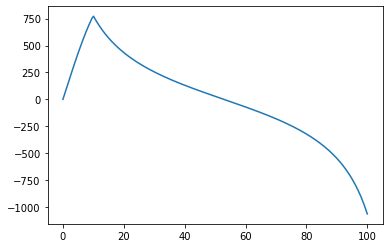

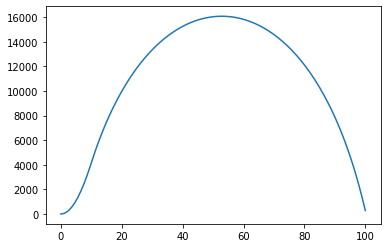

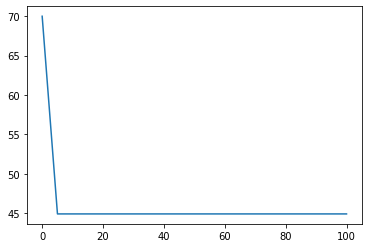

In [8]:
# making and launching rocket

m_prop = 25.09 # lb
m_dry = 70.0 - m_prop
mass_flow = 2.51 
burntime = 10
isp = 279
cd = 0.6
diameter = 5 / 12 # ft

spark = rocket(m_dry, m_prop, mass_flow, burntime, isp, cd, diameter)
x  = spark.altitude()
# spark._mass(9.99999999)

# x[:,0


In [9]:
# LOX at 650 psi
density_liquid_650 = 40.0 # lb/ft^3
density_vapor_650 = 15.2  # lb/ft^3

# LOX at 500 psi
dl_50_ox = 47.14 # lb/ft^3
dv_50_ox = 9.67   # lb/ft^3

# LOX at 450 psi
dl_45_ox = 49.07
dv_45_ox = 8.36
m_ox = 21.47

# LOX at 350 psi
dl_35_ox = 52.75
dv_35_ox = 6.12

# at 450 psi Meth
dl_45_m = 17.67 # lb/ft^3
dv_45_m = 3.52 # lb/ft^3
m_m = 8.95 # lb/ft^3

# at 350 psi meth
dl_35_m = 52.752 
dv_35_m = 6.1214

# at 500 psi meth
dl_50_m = 47.143
dv_50_m = 9.6694

# stuff
def find_volume(m, d_l, d_g):
    v = m / d_l
    temp = 0
    dv = 100
    while dv > 0.001: 
        dv = v - temp
        temp = v
        v = v + (dv * d_g/d_l)
        # print("yo", v)
    m = v*d_l
    return [v, m]

print("Oxidizer volume (ft^3): ", find_volume(m_ox, dl_45_ox, dv_45_ox)[0])
print("Oxidizer mass (lb): ", find_volume(m_ox, dl_45_ox, dv_45_ox)[1])

print("\nOxidizer new volume (ft^3):", find_volume(m_ox, dl_50_ox, dv_35_ox)[0])
print("Oxidizer new mass (lb):", find_volume(m_ox, dl_50_ox, dv_35_ox)[1])

print("\nFuel volume (ft^3): ", find_volume(m_m, dl_45_m, dv_45_m)[0])
print("Fuel mass (lb): ", find_volume(m_m, dl_45_m, dv_45_m)[1])

print("\n Fuel new volume (ft^3):", find_volume(m_m, dl_50_m, dv_35_m)[0])
print("Fuel new mass (lb):", find_volume(m_m, dl_50_m, dv_35_m)[1])

Oxidizer volume (ft^3):  0.5273759514371377
Oxidizer mass (lb):  25.878337937020344

Oxidizer new volume (ft^3): 0.5233839140180621
Oxidizer new mass (lb): 24.672317706811445

Fuel volume (ft^3):  0.6324693060643923
Fuel mass (lb):  11.175732638157813

 Fuel new volume (ft^3): 0.21816968712809978
Fuel new mass (lb): 10.285173560280008


In [10]:
Volume = find_volume(m_m, dl_50_m, dv_35_m)[0]
mass = find_volume(m_m, dl_50_m, dv_35_m)[1]

Volume = find_volume(m_ox, dl_50_ox, dv_35_ox)[0]
mass = find_volume(m_ox, dl_50_ox, dv_35_ox)[1]

In [11]:
# enthalpy LOX at 450 psi
uf_15_ox = -133 # kJ/kg
uf_500_ox = -27.7 # kJ/kg

# enthalpy LMethane
q = (uf_500_ox - uf_15_ox)*m_ox #Kj

print (q) 


# def find_power(dm_l, u_f, u_g, d_l, d_g):
#     u_fg = u_g-u_f                          # the change in internal energy (should it be enthalpy?)
#     dq = d_g/d_l * dm_l * u_fg              # the mass flow of gas * the change in internal energy
#     return dq

# find_power(mass_flow, ug_500_ox, uf_15_ox, density_liquid_650, density_vapor_650)


2260.7909999999997
